In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Know the shape and data types of columns

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Age_mean     891 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB


# Finding missing values

In [13]:
data.isnull().sum()
# from information we can see that there are missing values in Age and Cabin

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_mean         0
dtype: int64

In [6]:
data['Age'].mean()

29.69911764705882

#### Here I tried to fidn the mean of tha age column and created a new column Age_mean and null values are replaced with mean of age

In [181]:
data['Age_mean']=np.where(data['Age'].isnull(),data['Age'].mean(),data['Age'])

In [65]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0


In [66]:
data['Age_mean'].mean()

29.699117647058763

In [67]:
data['Age_mean'].std()

13.002015226002884

In [68]:
data['Age'].std()

14.526497332334044

In [69]:
data['Age_mean']=np.where(data['Age'].isnull(),data['Age'].mean(),data['Age'])

#### Above i tried to find the mean of new coulmn and age ,std of both column almost is same so replacing with mena is ok 

C:\Users\Admin\akshay4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\akshay4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


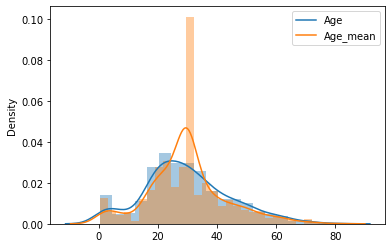

In [182]:
sn.distplot(x=data['Age'])

sn.distplot(x=data['Age_mean'])
plt.legend(['Age','Age_mean'])
plt.show()
# from the graph we can say that after replacing missing values with the mean there is some distrotion in the data set

# Replacing missing values using Ramdom sample

In [168]:
a=data['Age']
random_sample=a.dropna().sample(177)
random_sample
# Here we have generate random sample of size equal to Nan values

292    36.0
108    38.0
349    42.0
131    20.0
63      4.0
       ... 
34     28.0
652    21.0
424    18.0
205     2.0
717    27.0
Name: Age, Length: 177, dtype: float64

In [169]:
data['Age_Random']=data['Age']
random_sample.index=data[data['Age'].isnull()].index

In [174]:
data.loc[data['Age'].isnull(),'Age_Random']=random_sample
data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Random
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,27.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,26.0


In [177]:
# We will compare std of age and age.random
print(data['Age'].std())
print(data['Age_Random'].std())

14.526497332334044
14.480454116491515


C:\Users\Admin\akshay4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\akshay4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


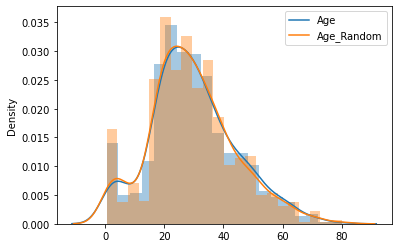

In [179]:
sn.distplot(x=data['Age'])

sn.distplot(x=data['Age_Random'])
plt.legend(['Age','Age_Random'])
plt.show()
# from the graph we can say that when we replaced missing values with random missing values variance is almost same so there 
# no distortion in the data

# End of Distribution imputation

<AxesSubplot:xlabel='Age'>

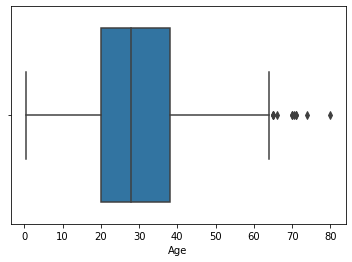

In [192]:
sn.boxplot(x=data['Age'])

In [195]:
# replace missing values with the of outliers
data['Age_imputation']=data['Age']
outlier=data['Age'].mean()+3*(data['Age'].std())
outlier

73.27860964406095

In [203]:
data['Age_imputation']=np.where(data['Age_imputation'].isnull(),outlier,data['Age'])

<AxesSubplot:xlabel='Age_imputation'>

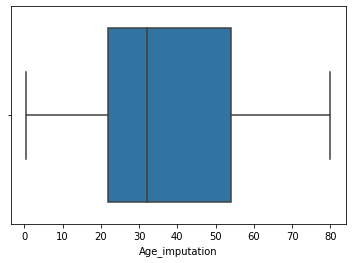

In [204]:
sn.boxplot(x=data['Age_imputation'])
# from here we have capture the outlier 

In [212]:
data.groupby(data['Cabin'])['Cabin'].count().sort_values(ascending=False)

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
F2             3
C22 C26        3
              ..
D19            1
D21            1
D28            1
D30            1
A10            1
Name: Cabin, Length: 147, dtype: int64

## Who was more in ship

In [188]:
data.groupby(by='Sex').size()
# from the graph we can say that there were male passangers in the boat compared to men

Sex
female    314
male      577
dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

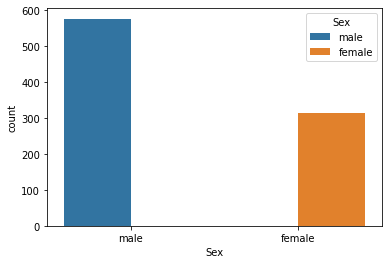

In [191]:
sn.countplot(data=data,x=data['Sex'],hue='Sex')

# Hypothesistesting

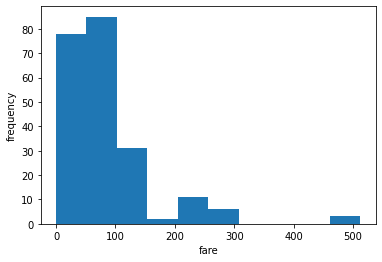

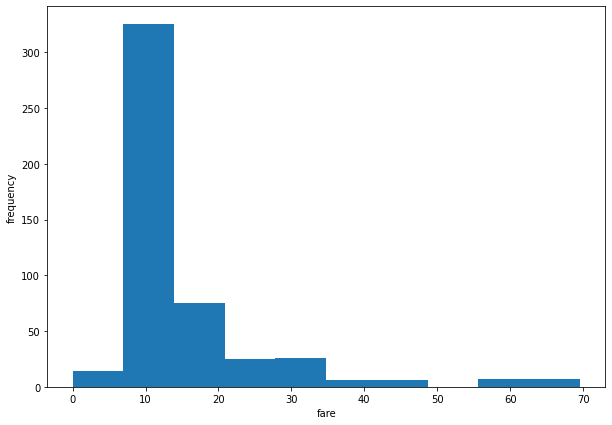

In [23]:
first_fares = data["Fare"][data['Pclass']==1]
first_mean=np.round(first_fares.mean(),2)
first_median=np.round(first_fares.median(),2)
first_conf=np.round(np.percentile(first_fares,[2.5,97.5]),2)
fig, ax=plt.subplots()
ax.hist(first_fares)
#ax.text()
plt.xlabel('fare')
plt.ylabel('frequency')


third_fares = data["Fare"][data["Pclass"]==3]
third_mean = round(np.mean(third_fares), 2)
third_median = round(np.median(third_fares), 2)
third_conf = np.round(np.percentile(third_fares, [2.5, 97.5]), 2)
fig, ax = plt.subplots(figsize = (10, 7))
ax.hist(third_fares)
plt.xlabel('fare')
plt.ylabel('frequency')
plt.show()

<BarContainer object of 2 artists>

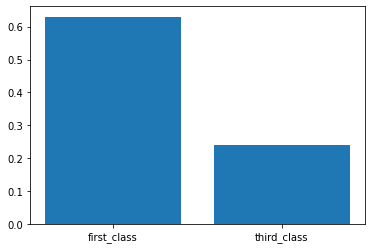

In [30]:
x=['first_class','third_class']
y=[np.round(data['Survived'][data['Pclass']==1].mean(),2),np.round(data['Survived'][data['Pclass']==3].mean(),2)]
plt.bar(x,y)

In [40]:
First_Class_Sample =np.array([np.mean(data[data['Pclass']==1].sample(20)['Survived'].values) for i in range(100)])
third_Class_Sample = np.array([np.mean(data[data["Pclass"]==3].sample(20)["Survived"].values) for i in range(100)])

C:\Users\Admin\akshay4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

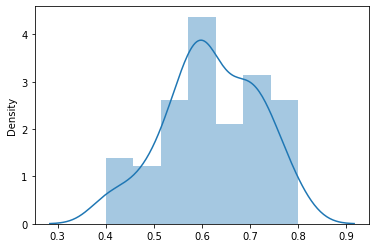

In [45]:
sn.distplot(First_Class_Sample)

C:\Users\Admin\akshay4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

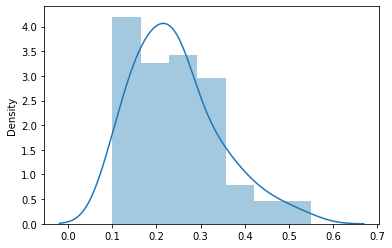

In [46]:
sn.distplot(third_Class_Sample)